In [1]:
import importlib

def check_modules(modules):
    for module in modules:
        try:
            importlib.import_module(module)
            print(f"\u2705 {module} is installed.")
        except ImportError:
            print(f"\u274C {module} is NOT installed.")

modules_to_check = [
    'numpy', 'pandas', 'ta', 'fbprophet', 'statsmodels',
    'sklearn', 'pykalman', 'pywt', 'backtester', 'matplotlib',
    'plotly', 'seaborn', 'keras'
]

check_modules(modules_to_check) # Note: backtester is part of auquantoolbox, an outdated module


✅ numpy is installed.
✅ pandas is installed.
❌ ta is NOT installed.
❌ fbprophet is NOT installed.
✅ statsmodels is installed.
✅ sklearn is installed.
❌ pykalman is NOT installed.
❌ pywt is NOT installed.
❌ backtester is NOT installed.
✅ matplotlib is installed.
✅ plotly is installed.
✅ seaborn is installed.
✅ keras is installed.


In [2]:
# Install missing Python packages in Google Colab
!pip install ta
!pip install prophet
!pip install pykalman
!pip install PyWavelets

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=726fc0feb2287c22f10b9784814be95a9f82bb00b978d99af698c92de9aa3dd6
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.5/248.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.5/141.5 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 29.9 MB/s eta 0:00:00


In [47]:
import numpy as np
import pandas as pd
import ta
from prophet import Prophet

import statsmodels
from statsmodels.tsa.stattools import coint
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.preprocessing import MinMaxScaler
from pykalman import KalmanFilter
np.random.seed(107)
import pywt
import sys
from datetime import datetime
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import plotly.offline as py
import plotly.graph_objs as go
import seaborn as sns
import yfinance as yf
from matplotlib import pyplot as plt
from tqdm import tqdm

# DOWNLOAD DATA FROM YAHOO

In [116]:
startDateStr = '2008-10-01'
endDateStr = '2018-10-02' # documentation said that endDateStr is exclusive for both yahoofinance and the original code, but actually printing the shapes showed otherwise..
instrumentIds = list(set(['ITOT', 'ACWI', 'IWV', 'VT', 'VTI',
                 'DIA', 'RSP', 'IOO', 'IVV', 'SPY',
                 'SHE', 'IWM', 'OEF', 'QQQ',
                 'CVY', 'RPG', 'RPV', 'IWB', 'IWF',
                 'IWD', 'IVW', 'IVE', 'PKW',
                 'PRF', 'SDY', 'VV', 'VUG',
                 'VTV', 'MGC', 'MGK', 'MGV', 'VIG',
                 'VYM', 'DTN', 'DLN', 'MDY', 'DVY',
                 'IWR', 'IWP', 'IWS', 'IJH', 'IJK',
                 'IJJ', 'PDP', 'DON', 'IWC', 'IWM',
                 'IWO', 'IWN', 'IJR', 'IJT', 'IJS',
                 'EEB', 'IDV', 'ACWX', 'BKF', 'EFA',
                 'EFG', 'EFV', 'SCZ', 'EEM', 'PID',
                 'DWX', 'DEM', 'DGS', 'AAXJ', 'EZU',
                 'EPP', 'IEV', 'ILF', 'FEZ', 'VGK',
                 'VPL', 'DFE', 'EWA', 'EWC', 'EWG',
                 'EWI', 'EWJ', 'EWD', 'EWL', 'EWP',
                 'EWU', 'DXJ', 'EWZ', 'FXI', 'EWH',
                 'EWW', 'RSX', 'EWS', 'EWM','EWY',
                 'EWT', 'EPI', 'XLY', 'IYC', 'ITB',
                 'XHB', 'VCR','XLP', 'IYK', 'VDC',
                 'XLE', 'IYE', 'IGE',
                 'VDE', 'QCLN', 'XLF','IYF', 'KBE',
                 'KRE', 'VFH']))

data = yf.download(
    tickers=instrumentIds,
    start=startDateStr,
    end=endDateStr,
    group_by='ticker',
    auto_adjust=False,
    threads=True
)
data_close = pd.DataFrame({ticker: data[ticker]['Close'] for ticker in instrumentIds if ticker in data.columns.levels[0]})
data_open = pd.DataFrame({ticker: data[ticker]['Open'] for ticker in instrumentIds if ticker in data.columns.levels[0]})
data_high = pd.DataFrame({ticker: data[ticker]['High'] for ticker in instrumentIds if ticker in data.columns.levels[0]})
data_low = pd.DataFrame({ticker: data[ticker]['Low'] for ticker in instrumentIds if ticker in data.columns.levels[0]})
data_vol = pd.DataFrame({ticker: data[ticker]['Volume'] for ticker in instrumentIds if ticker in data.columns.levels[0]})

[*********************100%***********************]  111 of 111 completed


# DATA ANALYTICS

In [117]:
print(data_close.shape)
data_close.iloc[:3,:10]

(2518, 111)


,ACWX,MGC,EFG,SDY,PDP,KBE,RPV,XHB,AAXJ,IWV
Date,,,,,,,,,,
2008-10-01,39.689999,40.110001,56.299999,50.950001,19.010000,35.709999,23.590000,20.110001,42.340000,67.650002
2008-10-02,37.720001,38.619999,53.779999,49.639999,17.990000,34.750000,22.780001,18.590000,40.700001,64.480003
2008-10-03,37.389999,38.240002,52.930000,48.660000,17.709999,33.380001,22.340000,18.049999,40.169998,63.549999


In [119]:
# also print the columns in the order of the original version of this notebook
wanted_tickers = ["VFH", "EPP", "IWF", "AAXJ", "EPI", "VYM", "SPY", "IWD", "IWC", "IWB"]
wanted_tickers.extend(["IVE", "IJJ"]) # forward looking: these were found to be best pairs according to original paper
data_close[wanted_tickers].iloc[:3]

,VFH,EPP,IWF,AAXJ,EPI,VYM,SPY,IWD,IWC,IWB,IVE,IJJ
Date,,,,,,,,,,,,
2008-10-01,40.090000,35.860001,47.509998,42.340000,15.97,42.279999,116.059998,63.919998,43.880001,63.099998,59.990002,34.009998
2008-10-02,38.650002,33.700001,45.470001,40.700001,15.30,41.169998,111.849998,62.020000,42.090000,60.459999,57.619999,32.195000
2008-10-03,37.130001,33.299999,44.840000,40.169998,14.85,40.490002,110.339996,60.860001,41.020000,59.680000,56.669998,31.430000


In [120]:
data_close[["IVE", "IJJ"]].iloc[:-3]

,IVE,IJJ
Date,,
2008-10-01,59.990002,34.009998
2008-10-02,57.619999,32.195000
2008-10-03,56.669998,31.430000
2008-10-06,54.790001,30.145000
2008-10-07,50.700001,28.285000
...,...,...
2018-09-20,118.400002,85.099998
2018-09-21,118.529999,85.029999
2018-09-24,117.650002,84.565002


In [105]:
a = pd.DataFrame({'Close':data_close.iloc[:3,1],
             'Open':data_open.iloc[:3,1],
                 'High':data_high.iloc[:3,1],
                 'Low':data_low.iloc[:3,1],
                 'Volume':data_vol.iloc[:3,1]})

print(a)

                Close       Open       High        Low  Volume
Date                                                          
2008-10-01  40.110001  40.369999  41.580002  39.500000  265300
2008-10-02  38.619999  39.950001  39.980000  38.480000  108000
2008-10-03  38.240002  39.259998  40.020000  38.009998   54400


In [106]:
c = pd.DataFrame({'Close':data_close['EPP'].iloc[:3],
             'Open':data_open['EPP'].iloc[:3],
                 'High':data_high['EPP'].iloc[:3],
                 'Low':data_low['EPP'].iloc[:3],
                 'Volume':data_vol['EPP'].iloc[:3]})

print(c)

                Close       Open       High        Low  Volume
Date                                                          
2008-10-01  35.860001  35.410000  37.200001  34.939999  569600
2008-10-02  33.700001  34.860001  34.990002  33.529999  751900
2008-10-03  33.299999  34.099998  35.080002  33.200001  853100


In [107]:
# Checking for any null values in data
d = data_close.isnull().any()
print(d[d == True])

RSX    True
SHE    True
EEB    True
dtype: bool


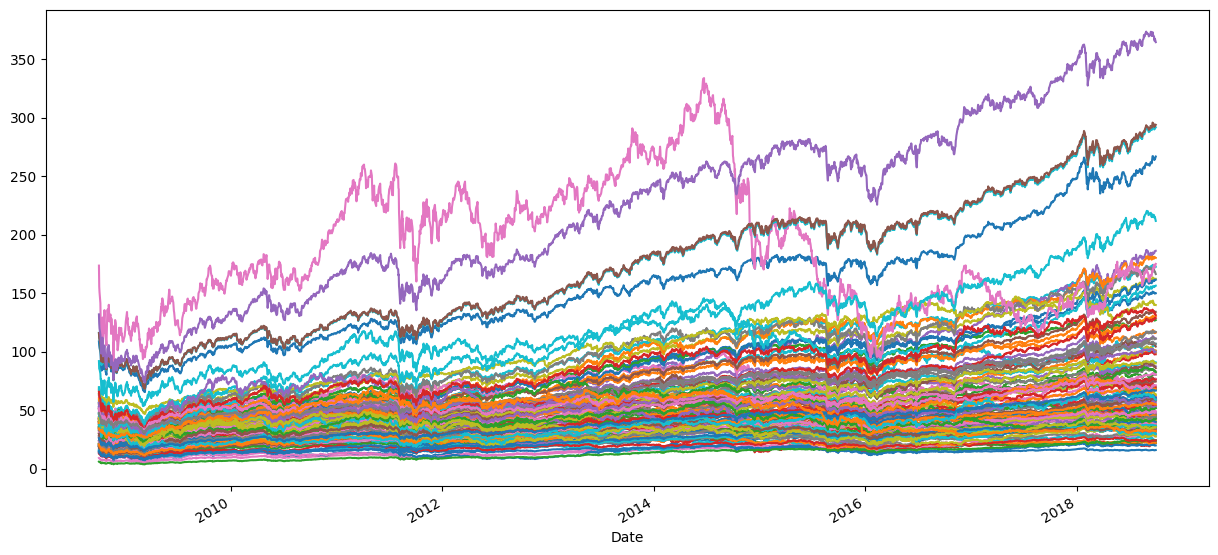

In [108]:
# Create a plot of the time series to visualize the data
for i in range(data_close.shape[1]):
    S = data_close.iloc[:, i]
    S.plot(figsize=(15,7))

Conclusion for now; this is totally different data still. We will first need to find how to correctly match up the data with original data.

In [112]:
data_close.iloc[1200].idxmax()

'XOP'

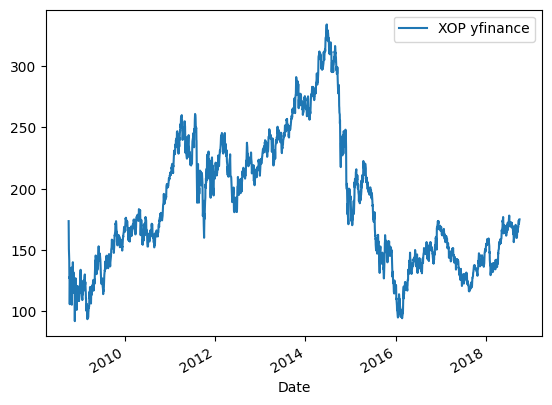

In [113]:
# find max value at first timepoint for data_close and the ticker for this timepoint
data_close.iloc[0].idxmax()

data_close['XOP'].plot(label='XOP yfinance')
plt.legend()

let's try and see what happens if we plot the data when using auto_adjust=True


[*********************100%***********************]  112 of 112 completed


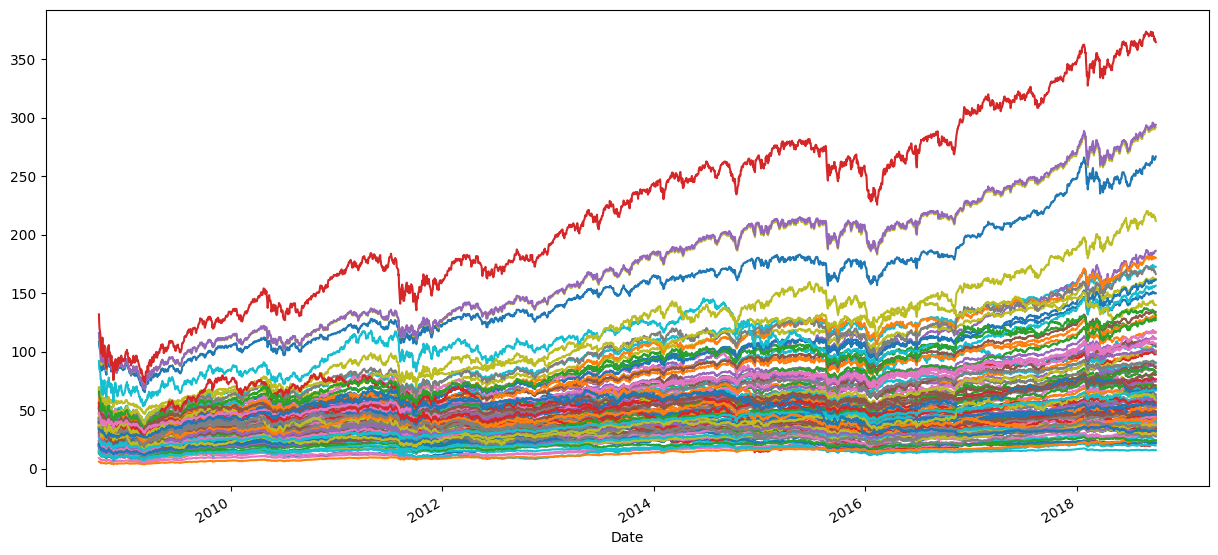

In [114]:
test_startDateStr = '2008-10-01'
test_endDateStr = '2018-10-02'
instrumentIds = list(set(['ITOT', 'ACWI', 'IWV', 'VT', 'VTI',
                 'DIA', 'RSP', 'IOO', 'IVV', 'SPY',
                 'SHE', 'IWM', 'OEF', 'QQQ',
                 'CVY', 'RPG', 'RPV', 'IWB', 'IWF',
                 'IWD', 'IVW', 'IVE', 'PKW',
                 'PRF', 'SDY', 'VV', 'VUG',
                 'VTV', 'MGC', 'MGK', 'MGV', 'VIG',
                 'VYM', 'DTN', 'DLN', 'MDY', 'DVY',
                 'IWR', 'IWP', 'IWS', 'IJH', 'IJK',
                 'IJJ', 'PDP', 'DON', 'IWC', 'IWM',
                 'IWO', 'IWN', 'IJR', 'IJT', 'IJS',
                 'EEB', 'IDV', 'ACWX', 'BKF', 'EFA',
                 'EFG', 'EFV', 'SCZ', 'EEM', 'PID',
                 'DWX', 'DEM', 'DGS', 'AAXJ', 'EZU',
                 'EPP', 'IEV', 'ILF', 'FEZ', 'VGK',
                 'VPL', 'DFE', 'EWA', 'EWC', 'EWG',
                 'EWI', 'EWJ', 'EWD', 'EWL', 'EWP',
                 'EWU', 'DXJ', 'EWZ', 'FXI', 'EWH',
                 'EWW', 'RSX', 'EWS', 'EWM','EWY',
                 'EWT', 'EPI', 'XLY', 'IYC', 'ITB',
                 'XHB', 'VCR','XLP', 'IYK', 'VDC',
                 'XLE', 'IYE', 'IGE',
                 'VDE', 'QCLN', 'XLF','IYF', 'KBE',
                 'KRE', 'VFH']))

test_data = yf.download(
    tickers=instrumentIds,
    start=startDateStr,
    end=endDateStr,
    group_by='ticker',
    auto_adjust=False,
    threads=True
)
test_data_close = pd.DataFrame({ticker: data[ticker]['Close'] for ticker in instrumentIds if ticker in data.columns.levels[0]})
test_data_open = pd.DataFrame({ticker: data[ticker]['Open'] for ticker in instrumentIds if ticker in data.columns.levels[0]})
test_data_high = pd.DataFrame({ticker: data[ticker]['High'] for ticker in instrumentIds if ticker in data.columns.levels[0]})
test_data_low = pd.DataFrame({ticker: data[ticker]['Low'] for ticker in instrumentIds if ticker in data.columns.levels[0]})
test_data_vol = pd.DataFrame({ticker: data[ticker]['Volume'] for ticker in instrumentIds if ticker in data.columns.levels[0]})

# Create a plot of the time series to visualize the data
for i in range(test_data_close.shape[1]):
    S = test_data_close.iloc[:, i]
    S.plot(figsize=(15,7))

# Generate Co-Integrated Pairs

In [ ]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = {}
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs[(keys[i], keys[j])] = result
    return score_matrix, pvalue_matrix, pairs

scores, pvalues, pairs = find_cointegrated_pairs(data_close)

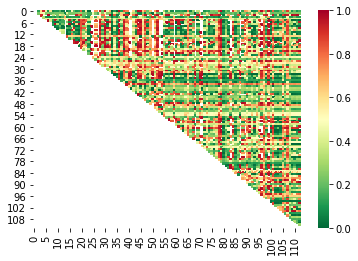

In [ ]:
# Heatmap to show the p-values of the cointegration test
# between each pair of stocks
#m = [0,0.2,0.4,0.6,0.8,1]
sns.heatmap(pvalues,  cmap='RdYlGn_r'
                , mask = (pvalues >= 0.98)
                )
pyplot.show()

In [ ]:
pairs_data = {key:value[1]  for (key, value) in pairs.items()}
pairs_data = sorted(pairs_data.items(), key=lambda x: x[1])
pairs_data[:10]

[(('SPY', 'IVV'), 0.0),
 (('IWV', 'VTI'), 1.6627551017454548e-21),
 (('IVE', 'IJJ'), 1.7380121213434282e-05),
 (('PRF', 'IVE'), 5.63604448556219e-05),
 (('VYM', 'DVY'), 6.758674613499686e-05),
 (('VFH', 'KBE'), 9.760150863380905e-05),
 (('VT', 'ACWI'), 0.00014183677751106706),
 (('DON', 'DVY'), 0.00015773162904002519),
 (('ITOT', 'VV'), 0.00016849004545661979),
 (('EWT', 'VPL'), 0.0002570590858793808)]

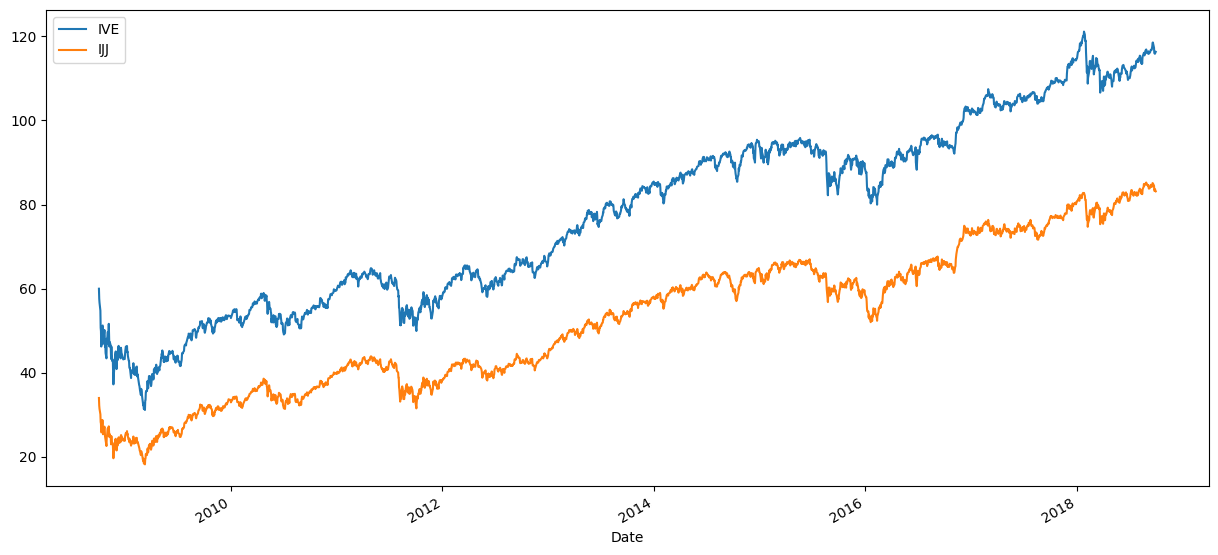

In [121]:
pair_data = pd.DataFrame({'S1_close':data_close['IVE'],'S2_close':data_close['IJJ']
                         ,'S1_open':data_open['IVE'],'S2_open':data_open['IJJ']
                         ,'S1_high':data_high['IVE'],'S2_high':data_high['IJJ']
                         ,'S1_low':data_low['IVE'],'S2_low':data_low['IJJ']
                         ,'S1_volume':data_vol['IVE'],'S2_volume':data_vol['IJJ']})
pair_data['S1_close'].plot(figsize=(15,7))
pair_data['S2_close'].plot(figsize=(15,7))
# add legend
pyplot.legend(['IVE', 'IJJ'])

,Stock Splits
Date,
2005-06-09 00:00:00-04:00,2.0
2020-10-19 00:00:00-04:00,2.0


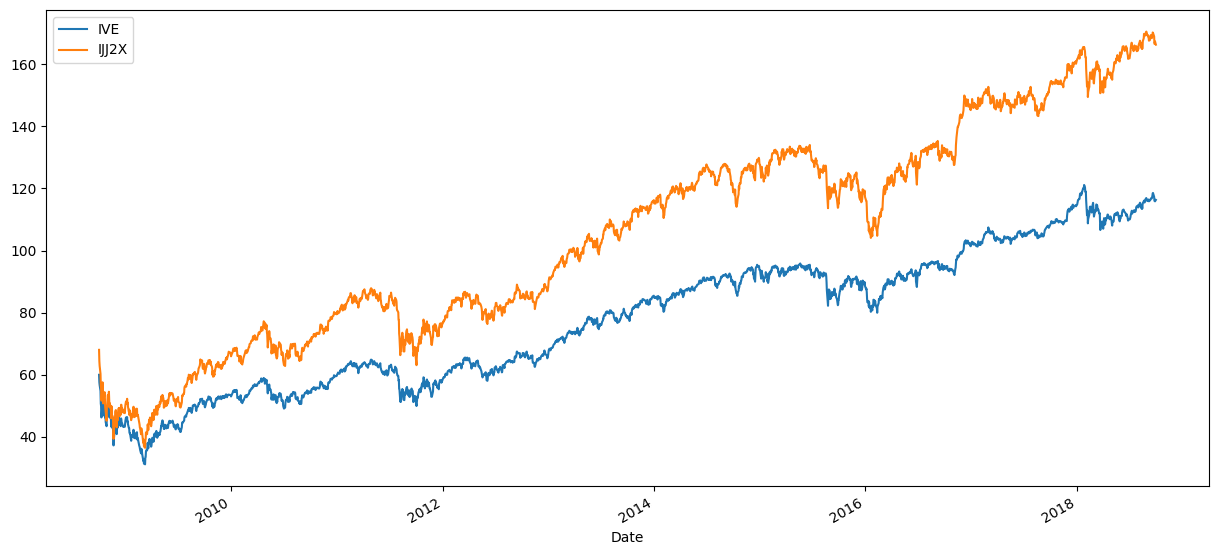

In [124]:
# To match them up, let's try to do IJJ times 2
data_close['IJJ2X'] = data_close['IJJ'] * 2
data_close[['IVE', "IJJ2X"]].plot(figsize=(15,7))
pyplot.legend(['IVE', 'IJJ2X'])

# Let's try to gather the splits again and see if we can find an answer there.
ticker = 'IJJ'
yf_ticker = yf.Ticker(ticker)
splits = yf_ticker.splits
splits

The reason that the YahooStockDataSource has 2x'ed IJJ (which doesn't agree with actual stock prices) likely has something to do with the 2x stocksplit in 2005. I guess that that shouldn't have too much to do with getting positive results for the kalman filter though.

However, I will still be using IJJ2x for the kalman filter for now.

In [125]:
# For now, we will therefore reinitialize pair_data to use IJJ2X
data_close['IJJ2X'] = data_close['IJJ'] * 2
data_open['IJJ2X'] = data_open['IJJ'] * 2
data_high['IJJ2X'] = data_high['IJJ'] * 2
data_low['IJJ2X'] = data_low['IJJ'] * 2
data_vol['IJJ2X'] = data_vol['IJJ'] # stays the same volume of course

pair_data = pd.DataFrame({'S1_close':data_close['IVE'],'S2_close':data_close['IJJ2X']
                         ,'S1_open':data_open['IVE'],'S2_open':data_open['IJJ2X']
                         ,'S1_high':data_high['IVE'],'S2_high':data_high['IJJ2X']
                         ,'S1_low':data_low['IVE'],'S2_low':data_low['IJJ2X']
                         ,'S1_volume':data_vol['IVE'],'S2_volume':data_vol['IJJ2X']})

## Adding Technical Indictors

In [126]:
# add technical indicators
# 1. Momentum Indicators
# Relative Strength Index
pair_data['S1_rsi'] = ta.momentum.rsi(pair_data['S1_close'], window=14)
pair_data['S2_rsi'] = ta.momentum.rsi(pair_data['S2_close'], window=14)


# 2. Volume Indicators
# Money Flow Index
pair_data['S1_mfi'] = ta.volume.money_flow_index(pair_data['S1_high'], pair_data['S1_low'],
                                                   pair_data['S1_close'], pair_data['S1_volume'], window=14)
pair_data['S2_mfi'] = ta.volume.money_flow_index(pair_data['S2_high'], pair_data['S2_low'],
                                                   pair_data['S2_close'], pair_data['S2_volume'], window=14)
# Accumulation/Distribution Index (ADI)
pair_data['S1_adi'] = ta.volume.acc_dist_index(pair_data['S1_high'], pair_data['S1_low'], pair_data['S1_close'], pair_data['S1_volume'])
pair_data['S2_adi'] = ta.volume.acc_dist_index(pair_data['S2_high'], pair_data['S2_low'], pair_data['S2_close'], pair_data['S2_volume'])
# Volume-price trend (VPT)
pair_data['S1_vpt'] = ta.volume.volume_price_trend(pair_data['S1_close'], pair_data['S1_volume'])
pair_data['S2_vpt'] = ta.volume.volume_price_trend(pair_data['S2_close'], pair_data['S2_volume'])

# 3. Volatility Indicators
# Average True Range (ATR)
pair_data['S1_atr'] = ta.volatility.average_true_range(pair_data['S1_high'], pair_data['S1_low'],
                                                       pair_data['S1_close'], window=14)
pair_data['S2_atr'] = ta.volatility.average_true_range(pair_data['S2_high'], pair_data['S2_low'],
                                                       pair_data['S2_close'], window=14)
# Bollinger Bands (BB) N-period simple moving average (MA)
pair_data['S1_bb_ma'] = ta.volatility.bollinger_mavg(pair_data['S1_close'], window=20)
pair_data['S2_bb_ma'] = ta.volatility.bollinger_mavg(pair_data['S2_close'], window=20)

# 4. Trend Indicators
# Average Directional Movement Index (ADX)
pair_data['S1_adx'] = ta.trend.adx(pair_data['S1_high'], pair_data['S1_low'], pair_data['S1_close'], window=14)
pair_data['S2_adx'] = ta.trend.adx(pair_data['S2_high'], pair_data['S2_low'], pair_data['S2_close'], window=14)
# Exponential Moving Average
pair_data['S1_ema'] = ta.trend.ema_indicator(pair_data['S1_close'], window=14)
pair_data['S2_ema'] = ta.trend.ema_indicator(pair_data['S2_close'], window=14)
# Moving Average Convergence Divergence (MACD)
pair_data['S1_macd'] = ta.trend.macd(pair_data['S1_close'], window_fast=14, window_slow=30)
pair_data['S2_macd'] = ta.trend.macd(pair_data['S2_close'], window_fast=14, window_slow=30)

# 5. Other Indicators
# Daily Log Return (DLR)
pair_data['S1_dlr'] = ta.others.daily_log_return(pair_data['S1_close'])
pair_data['S2_dlr'] = ta.others.daily_log_return(pair_data['S2_close'])

## Spreads for Ground Truth

<ipython-input-127-e40f47e39bb8>:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



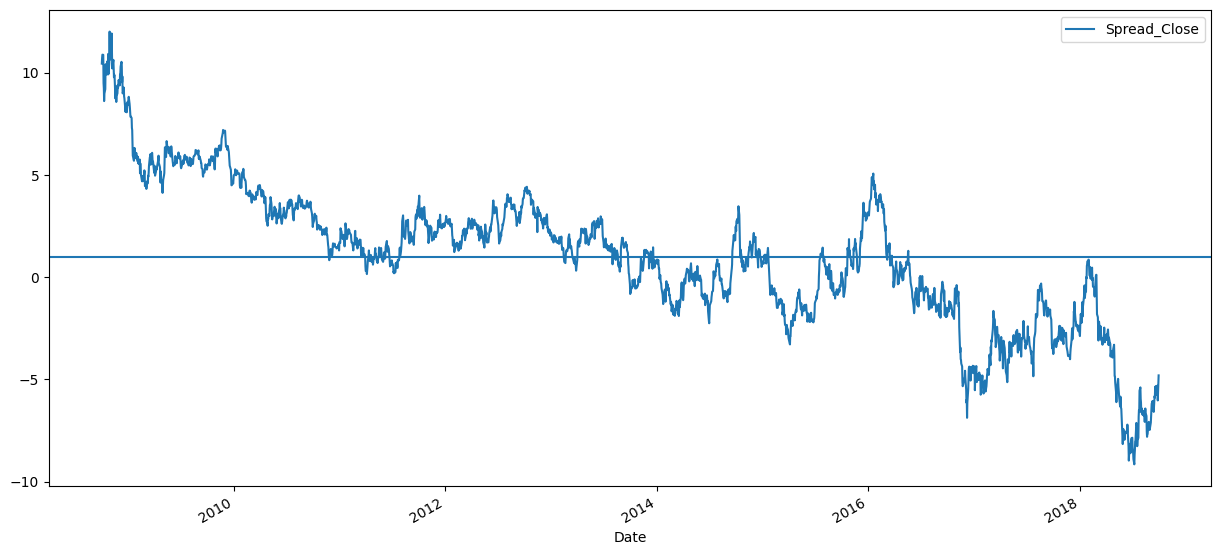

In [127]:
est = sm.OLS(pair_data.S1_close, pair_data.S2_close)
est = est.fit()
alpha = -est.params[0]
pair_data['Spread_Close'] = pair_data.S1_close + (pair_data.S2_close * alpha)
pair_data['Spread_Close'].plot(figsize=(15,7))
pyplot.axhline(pair_data['Spread_Close'].mean())
pyplot.legend(['Spread_Close'])

In [128]:
est_op = sm.OLS(pair_data.S1_open, pair_data.S2_open)
est_op = est_op.fit()
alpha_op = -est_op.params[0]
pair_data['Spread_Open'] = pair_data.S1_open + (pair_data.S2_open * alpha_op)
est_hi = sm.OLS(pair_data.S1_high, pair_data.S2_high)
est_hi = est_hi.fit()
alpha_hi = -est_hi.params[0]
pair_data['Spread_High'] = pair_data.S1_high + (pair_data.S2_high * alpha_hi)
est_lo = sm.OLS(pair_data.S1_low, pair_data.S2_low)
est_lo = est_lo.fit()
alpha_lo = -est_lo.params[0]
pair_data['Spread_Low'] = pair_data.S1_low + (pair_data.S2_low * alpha_lo)

<ipython-input-128-7804ef104272>:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-128-7804ef104272>:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-128-7804ef104272>:11: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



## Wavelet Denoising

In [129]:
def wav_den(ts_orig):
    (ca, cd) = pywt.dwt(ts_orig, 'db8')
    cat = pywt.threshold(ca, np.std(ca)/8, mode='soft')
    cdt = pywt.threshold(cd, np.std(cd)/8, mode='soft')
    ts_rec = pywt.idwt(cat, cdt, 'db8')
    return ts_rec[1:]

In [130]:
#Use MinMaxScaler to normalize Weighted Price to range from 0 to 1
cols = ['Spread_Close', 'Spread_Open', 'Spread_High', 'Spread_Low', 'S1_volume',
                                          'S2_volume', 'S1_rsi', 'S2_rsi', 'S1_mfi', 'S2_mfi', 'S1_adi', 'S2_adi',
                                           'S1_vpt', 'S2_vpt', 'S1_atr', 'S2_atr', 'S1_bb_ma', 'S2_bb_ma', 'S1_adx',
                                           'S2_adx', 'S1_ema', 'S2_ema', 'S1_macd', 'S2_macd', 'S1_dlr', 'S2_dlr']
lstm_pair_data = pd.DataFrame({'Spread_Close':pair_data['Spread_Close'][30:],
                               'Spread_Open':pair_data['Spread_Open'][30:],
                               'Spread_High':pair_data['Spread_High'][30:],
                               'Spread_Low':pair_data['Spread_Low'][30:],
                               'S1_volume':pair_data['S1_volume'][30:],
                               'S2_volume':pair_data['S2_volume'][30:],
                               'S1_rsi':pair_data['S1_rsi'][30:],
                               'S2_rsi':pair_data['S2_rsi'][30:],
                               'S1_mfi':pair_data['S1_mfi'][30:],
                               'S2_mfi':pair_data['S2_mfi'][30:],
                               'S1_adi':pair_data['S1_adi'][30:],
                               'S2_adi':pair_data['S2_adi'][30:],
                               'S1_vpt':pair_data['S1_vpt'][30:],
                               'S2_vpt':pair_data['S2_vpt'][30:],
                               'S1_atr':pair_data['S1_atr'][30:],
                               'S2_atr':pair_data['S2_atr'][30:],
                               'S1_bb_ma':pair_data['S1_bb_ma'][30:],
                               'S2_bb_ma':pair_data['S2_bb_ma'][30:],
                               'S1_adx':pair_data['S1_adx'][30:],
                               'S2_adx':pair_data['S2_adx'][30:],
                               'S1_ema':pair_data['S1_ema'][30:],
                               'S2_ema':pair_data['S2_ema'][30:],
                               'S1_macd':pair_data['S1_macd'][30:],
                               'S2_macd':pair_data['S2_macd'][30:],
                               'S1_dlr':pair_data['S1_dlr'][30:],
                               'S2_dlr':pair_data['S2_dlr'][30:]
                              }, columns = cols)

In [131]:
train_size = int(len(lstm_pair_data) * 0.9)
dev_size = int((len(lstm_pair_data) - train_size) * 0.5) - 30
test_size = len(lstm_pair_data) - train_size - dev_size
train, dev, test = lstm_pair_data[0:train_size], lstm_pair_data[train_size:train_size + dev_size], lstm_pair_data[train_size + dev_size:len(lstm_pair_data)]
print(len(train), len(dev), len(test))

2239 94 155


In [135]:
# first test whether wavelet denoising is working as expected
debug_train_den = pd.DataFrame(columns = cols)
col = cols[0]
train[col]

,Spread_Close
Date,
2008-11-12,9.785531
2008-11-13,9.909734
2008-11-14,9.869950
2008-11-17,8.744856
2008-11-18,9.345308
...,...
2017-09-28,-3.465696
2017-09-29,-3.323085
2017-10-02,-3.755538


In [136]:
train_den = pd.DataFrame(columns = cols)
for col in cols:
    train_den[col] = wav_den(train[col])

Some plots to see whether wavelet denoising was done as expected:

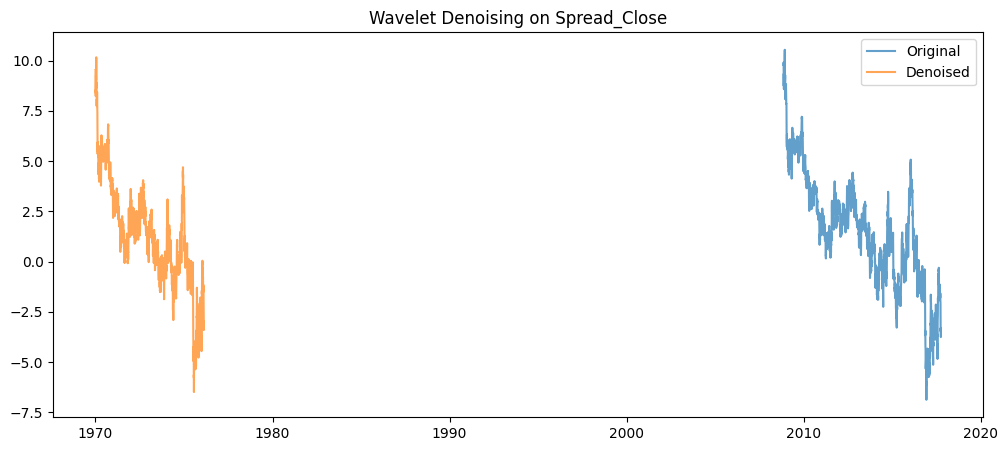

Original mean: 1.4539533070308912
Denoised mean: 1.2997218000650717
Original head: Date
2008-11-12    9.785531
2008-11-13    9.909734
2008-11-14    9.869950
2008-11-17    8.744856
2008-11-18    9.345308
2008-11-19    8.910768
2008-11-20    8.576873
2008-11-21    8.861785
2008-11-24    8.997416
2008-11-25    9.398363
Name: Spread_Close, dtype: float64
Denoised head: [9.53518721 9.49879975 8.39617952 8.98494601 8.53721462 8.23110707
 8.48552063 8.64675535 9.02134685 8.9121829 ]


In [140]:
# Possible columns:
# ['Spread_Close',
#  'Spread_Open',
#  'Spread_High',
#  'Spread_Low',
#  'S1_volume',
#  'S2_volume',
#  'S1_rsi',
#  'S2_rsi',
#  'S1_mfi',
#  'S2_mfi',
#  'S1_adi',
#  'S2_adi',
#  'S1_vpt',
#  'S2_vpt',
#  'S1_atr',
#  'S2_atr',
#  'S1_bb_ma',
#  'S2_bb_ma',
#  'S1_adx',
#  'S2_adx',
#  'S1_ema',
#  'S2_ema',
#  'S1_macd',
#  'S2_macd',
#  'S1_dlr',
#  'S2_dlr']
col = 'Spread_Close'
original = train[col]
denoised = wav_den(original)

plt.figure(figsize=(12, 5))
plt.plot(original, label='Original', alpha=0.7)
plt.plot(denoised, label='Denoised', alpha=0.7)
plt.legend()
plt.title(f'Wavelet Denoising on {col}')
plt.show()

print(f'Original mean: {original.mean()}')
print(f'Denoised mean: {denoised.mean()}')
print(f'Original head: {original[:10]}')
print(f'Denoised head: {denoised[:10]}')

## Prediction Period Setting

In [141]:
look_back = 1

In [142]:
scaler = MinMaxScaler(feature_range=(0, 1))
# Create function for creating dataset with look back
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i, :]
        dataX.append(a)
        dataY.append(dataset[(i+1):(i+1+look_back), 0])
    print(len(dataY))
    return dataX, np.array(scaler.fit_transform(dataX)), dataY, np.array(scaler.fit_transform(dataY))

# Generate dataset for trainX, trainY, testX, testY
trainX_untr, trainX, trainY_untr, trainY = create_dataset(train_den.values, look_back)
devX_untr, devX, devY_untr, devY = create_dataset(dev.values, look_back)
testX_untr, testX, testY_untr, testY = create_dataset(test.values, look_back)

2238
93
154


## ACCURACY METRIC

In [143]:
def acc_metric(true_value, predicted_value):
    acc_met = 0.0
    m = len(true_value)
    for i in range(m):
        acc_met += mean_squared_error(true_value[i], predicted_value[i])
    acc_met /= m
    return np.sqrt(acc_met)

## Spread Prediction using Kalman Filter

In [144]:
def KalmanFilterAverage(x):
  # Construct a Kalman filter
    kf = KalmanFilter(transition_matrices = [1],
    observation_matrices = [1],
    initial_state_mean = 0,
    initial_state_covariance = 1,
    observation_covariance=1,
    transition_covariance=.01)

  # Use the observed values of the price to get a rolling mean
    state_means, _ = kf.filter(x.values)
    state_means = pd.Series(state_means.flatten(), index=x.index)
    return state_means

# Kalman filter regression
def KalmanFilterRegression(x,y):
    delta = 1e-3
    trans_cov = delta / (1 - delta) * np.eye(2) # How much random walk wiggles
    obs_mat = np.expand_dims(np.vstack([[x], [np.ones(len(x))]]).T, axis=1)

    kf = KalmanFilter(n_dim_obs=1, n_dim_state=2, # y is 1-dimensional, (alpha, beta) is 2-dimensional
    initial_state_mean=[0,0],
    initial_state_covariance=np.ones((2, 2)),
    transition_matrices=np.eye(2),
    observation_matrices=obs_mat,
    observation_covariance=2,
    transition_covariance=trans_cov)

    # Use the observations y to get running estimates and errors for the state parameters
    state_means, state_covs = kf.filter(y.values)
    return state_means

In [145]:
def normalize(series):
    return (series - np.mean(series)) / np.std(series)

In [146]:
state_means = - KalmanFilterRegression(KalmanFilterAverage(pair_data.S1_close),KalmanFilterAverage(pair_data.S2_close))[:,0]
results = normalize(pair_data.S1_close + (pair_data.S2_close * state_means))
forecast = results[-len(testX):].values
yhat_KF = forecast
yhat_KF_mse = []
mse = 0.0
if look_back == 1:
    for i in range(len(forecast)):
        temp = []
        temp.append(forecast[i])
        yhat_KF_mse.append(np.array(temp))
    mse = acc_metric(normalize(testY_untr), yhat_KF_mse)
else:
    mse = 0.0
mse

np.float64(1.9346802163835841)

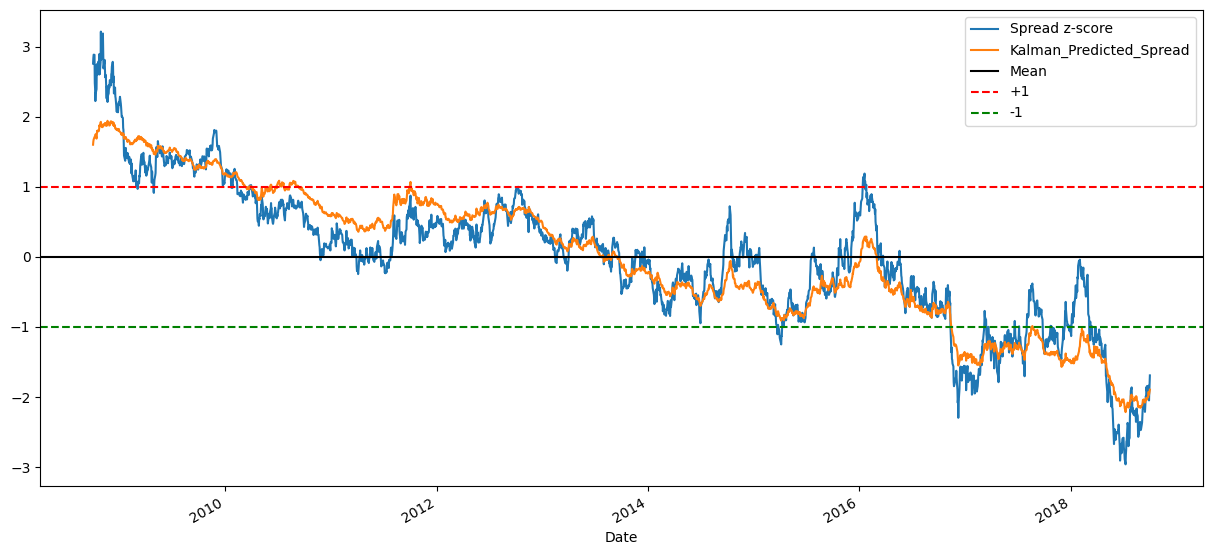

In [147]:
normalize(pair_data['Spread_Close']).plot(figsize=(15,7))
results.plot(figsize=(15,7))
pyplot.axhline(normalize(pair_data['Spread_Close']).mean(), color='black')
pyplot.axhline(1.0, color='red', linestyle='--')
pyplot.axhline(-1.0, color='green', linestyle='--')
pyplot.legend(['Spread z-score', 'Kalman_Predicted_Spread', 'Mean', '+1', '-1'])
pyplot.show()

## Spread Prediction using ARIMA

In [ ]:
yhat_ARIMA = []
yhat_ARIMA_mse = []
data = lstm_pair_data['Spread_Close'].values
for i in range(train_size+dev_size, len(lstm_pair_data)-1):
    model = ARIMA(data[:i], order=(1,0,0))
    model_fit = model.fit(disp=0)
    temp = []
    forecast = (model_fit.forecast(steps=look_back)[0])
    yhat_ARIMA.append(forecast[0])
    for j in range(len(forecast)):
        temp.append(forecast[j])
    yhat_ARIMA_mse.append(np.array(temp))
mse = 0.0
mse = acc_metric(testY_untr, yhat_ARIMA_mse)
mse

0.5797150095521981

## Spread Prediction using Vector Auto-Regression Model

In [ ]:
yhat_VAR_mse = []
yhat_VAR = []
data = lstm_pair_data.values
for i in range(train_size+dev_size, len(lstm_pair_data)-1):
    model = VAR(data[:i,:])
    model_fit = model.fit()
    temp = []
    forecast = model_fit.forecast(model_fit.y, steps=look_back)[:,0]
    yhat_VAR.append(forecast[0])
    for j in range(len(forecast)):
        temp.append(forecast[j])
    yhat_VAR_mse.append(np.array(temp))
mse = 0.0
mse = acc_metric(testY_untr, yhat_VAR_mse)
mse

0.579020113460353

## Spread Prediction using Facebook Prophet

In [ ]:
yhat_FbProphet = []
yhat_FbProphet_mse = []
cols = ['ds', 'y']
fbData = pd.DataFrame({'ds':lstm_pair_data.index,'y':lstm_pair_data.Spread_Close}, columns = cols)
for i in range(train_size+dev_size+1, len(lstm_pair_data)):
    model = Prophet(daily_seasonality=True)
    model.fit(fbData[:i])
    temp = []
    future = model.make_future_dataframe(periods=look_back)
    forecast = (model.predict(future)).yhat[i:].values
    yhat_FbProphet.append(forecast[0])
    for j in range(len(forecast)):
        temp.append(forecast[j])
    yhat_FbProphet_mse.append(np.array(temp))
mse = 0.0
mse = acc_metric(testY_untr, yhat_FbProphet_mse)
mse

2.1973440943283844

## Spread Prediction using LSTM

In [ ]:
# Reshape X for model training
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
devX = np.reshape(devX, (devX.shape[0], 1, devX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# Running the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences = True))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(look_back))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
history = model.fit(trainX, trainY, epochs=200, batch_size=20, validation_data=(devX, devY), verbose=0, shuffle=True)

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 256)            289792    
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 815,361
Trainable params: 815,361
Non-trainable params: 0
_________________________________________________________________


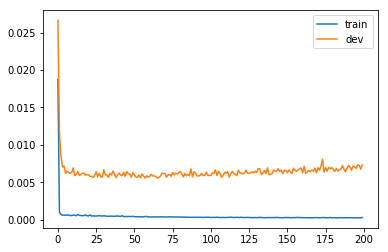

In [ ]:
# Plot line graph to show amount loss according the the epoch
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='dev')
pyplot.legend()
pyplot.show()

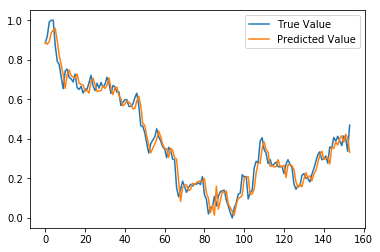

In [ ]:
# Make prediction using textX and plotting line graph against testY
yhat = model.predict(testX)
pyplot.plot(testY, label='True Value')
pyplot.plot(yhat, label='Predicted Value')
pyplot.legend()
pyplot.show()

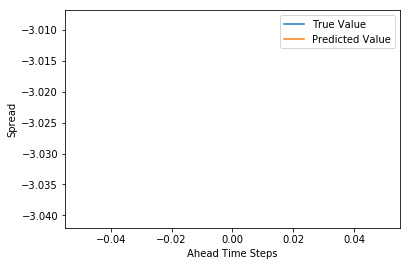

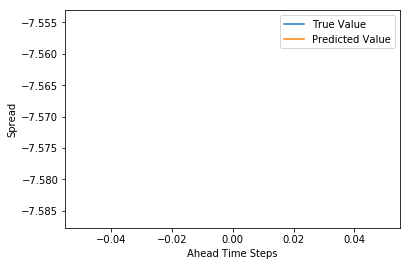

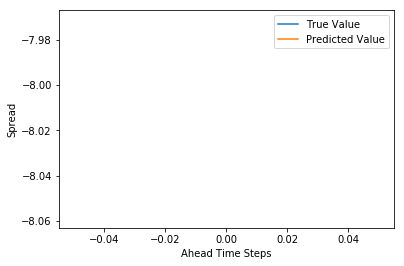

In [ ]:
a=pyplot.figure(1)
pyplot.plot(scaler.inverse_transform(testY)[35:36][0], label='True Value')
pyplot.plot(scaler.inverse_transform(yhat)[35:36][0], label='Predicted Value')
pyplot.legend()
pyplot.ylabel('Spread')
pyplot.xlabel('Ahead Time Steps')
pyplot.show()
b=pyplot.figure(1)
pyplot.plot(scaler.inverse_transform(testY)[75:76][0], label='True Value')
pyplot.plot(scaler.inverse_transform(yhat)[75:76][0], label='Predicted Value')
pyplot.legend()
pyplot.ylabel('Spread')
pyplot.xlabel('Ahead Time Steps')
pyplot.show()
c=pyplot.figure(1)
pyplot.plot(scaler.inverse_transform(testY)[103:104][0], label='True Value')
pyplot.plot(scaler.inverse_transform(yhat)[103:104][0], label='Predicted Value')
pyplot.legend()
pyplot.ylabel('Spread')
pyplot.xlabel('Ahead Time Steps')
pyplot.show()

In [ ]:
# Scaler Inverse Y back to normal value
yhat_LSTM = scaler.inverse_transform(yhat)
testY_LSTM = scaler.inverse_transform(testY)

In [ ]:
# Training and Test error
mse_train = acc_metric(scaler.inverse_transform(trainY), scaler.inverse_transform(model.predict(trainX)))
mse_test = acc_metric(yhat_LSTM, testY_LSTM)
mse_train, mse_test

(0.16069211734808284, 0.4341993440908405)

In [ ]:
predictDates = lstm_pair_data.tail(len(testX)).index
testY_reshape = normalize(testY_LSTM).reshape(len(testY_LSTM))
yhat_reshape = normalize(yhat_LSTM).reshape(len(yhat_LSTM))
kalman_reshape = normalize(yhat_KF).reshape(len(yhat_KF))
#Plot predicted and actual line graph
layout = go.Layout(
        yaxis=dict(
        title='Spread',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18
        )))
actual_chart = go.Scatter(x=predictDates, y=testY_reshape, name= 'Actual Spread')
predict_chart = go.Scatter(x=predictDates, y=yhat_reshape, name= 'LSTM Predict Spread')
predict_kalman_chart = go.Scatter(x=predictDates, y=kalman_reshape, name= 'Kalman Filter Predict Spread')
fig = go.Figure(data = [predict_kalman_chart, predict_chart, actual_chart], layout = layout)
py.iplot(fig)#([predict_chart, actual_chart])

## Tuning Hyperparameters using Mean Squared Error as Metric

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
devX = np.reshape(devX, (devX.shape[0], 1, devX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# Tuning Hyperparameters
cols = ['LSTM_Lyr1', 'LSTM_Lyr2', 'Regularization', 'Epochs', 'Batch_Size', 'MSE']
MSE_Results = pd.DataFrame(columns = cols)
LSTM_lyr1 = [16, 32, 128, 256, 512]
LSTM_lyr2 = [16, 32, 128, 256, 512]
epochs = [100, 200, 300, 400, 500]
batch_size = [20, 40, 60, 80, 100]
regularization = [0.0, 0.1, 0.2, 0.3]
k = 400
l = 100
m = 0.2
for i in LSTM_lyr1:
    for j in LSTM_lyr2:
        model = Sequential()
        model.add(LSTM(i, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences = True))
        model.add(LSTM(j))
        model.add(Dropout(m))
        model.add(Dense(look_back))
        model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
        history = model.fit(trainX, trainY, epochs=k, batch_size=l, validation_data=(devX, devY), verbose=0, shuffle=True)
        yhat = model.predict(testX)
        yhat_LSTM = scaler.inverse_transform(yhat)
        testY_LSTM = scaler.inverse_transform(testY)
        mse = acc_metric(testY_LSTM, yhat_LSTM)
        MSE_Results = MSE_Results.append({'LSTM_Lyr1': i,
                                          'LSTM_Lyr2': j,
                                          'Regularization': m,
                                          'Epochs': k,
                                          'Batch_Size': l,
                                          'MSE': mse}, ignore_index=True)
MSE_Results

,LSTM_Lyr1,LSTM_Lyr2,Regularization,Epochs,Batch_Size,MSE
0,16.0,16.0,0.0,400.0,100.0,0.943567


## Trading Strategy

In [ ]:
# Test Data
test_data = pd.DataFrame({'S1':pair_data['S1_close'].iloc[-len(testX):],'S2':pair_data['S2_close'].iloc[-len(testX):]})
test_data['Actual_Spread'] = pair_data['Spread_Close'].iloc[-len(testX):]
test_data['Kalman_Predicted_Spread']  = yhat_KF
test_data['ARIMA_Predicted_Spread']  = yhat_ARIMA
test_data['VAR_Predicted_Spread']  = yhat_VAR
test_data['FBProphet_Predicted_Spread']  = yhat_FbProphet
test_data['LSTM_Predicted_Spread'] = list(yhat_LSTM[:,0])
data = test_data['Actual_Spread']

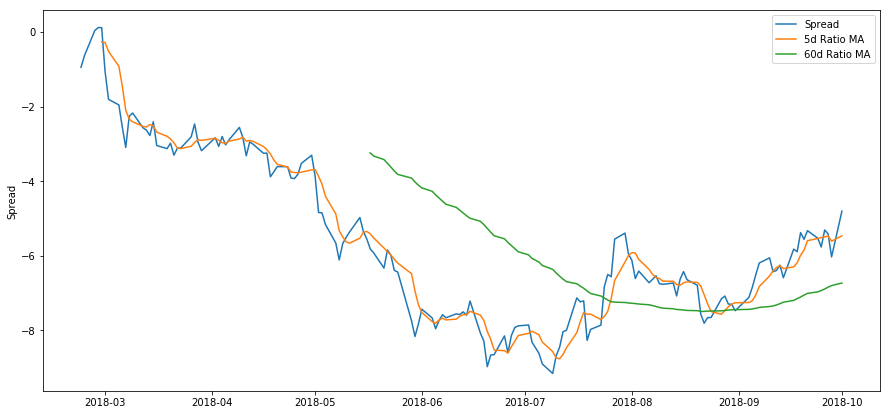

In [ ]:
ratios_mavg5 = data.rolling(window=5,
                               center=False).mean()

ratios_mavg60 = data.rolling(window=60,
                               center=False).mean()

std_60 = data.rolling(window=60,
                        center=False).std()

zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
pyplot.figure(figsize=(15,7))
pyplot.plot(data.index, data.values)
pyplot.plot(ratios_mavg5.index, ratios_mavg5.values)
pyplot.plot(ratios_mavg60.index, ratios_mavg60.values)

pyplot.legend(['Spread','5d Ratio MA', '60d Ratio MA'])

pyplot.ylabel('Spread')
pyplot.show()

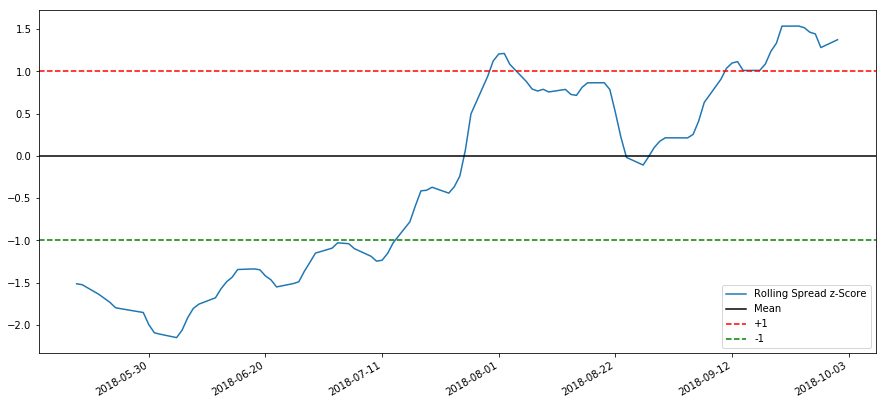

In [ ]:
# Take a rolling 60 day standard deviation
std_60 = data.rolling(window=60,center=False).std()
std_60.name = 'std 60d'

# Compute the z score for each day
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
zscore_60_5.name = 'z-score'

pyplot.figure(figsize=(15,7))
zscore_60_5.plot()
pyplot.axhline(0, color='black')
pyplot.axhline(1.0, color='red', linestyle='--')
pyplot.axhline(-1.0, color='green', linestyle='--')
pyplot.legend(['Rolling Spread z-Score', 'Mean', '+1', '-1'])
pyplot.show()

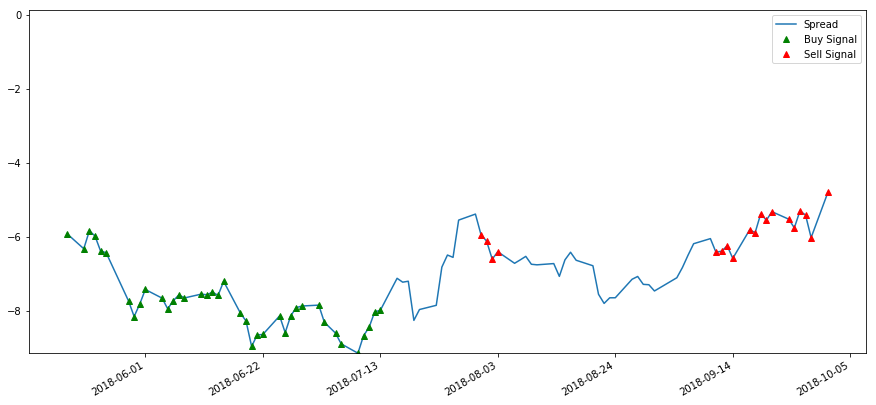

In [ ]:
# Plot the ratios and buy and sell signals from z score
pyplot.figure(figsize=(15,7))

data[60:].plot()
buy = data.copy()
sell = data.copy()
buy[zscore_60_5>-1] = -100
sell[zscore_60_5<1] = -100
buy[60:].plot(color='g', linestyle='None', marker='^')
sell[60:].plot(color='r', linestyle='None', marker='^')
x1,x2,y1,y2 = pyplot.axis()
pyplot.axis((x1,x2,data.min(),data.max()))
pyplot.legend(['Spread', 'Buy Signal', 'Sell Signal'])
pyplot.show()

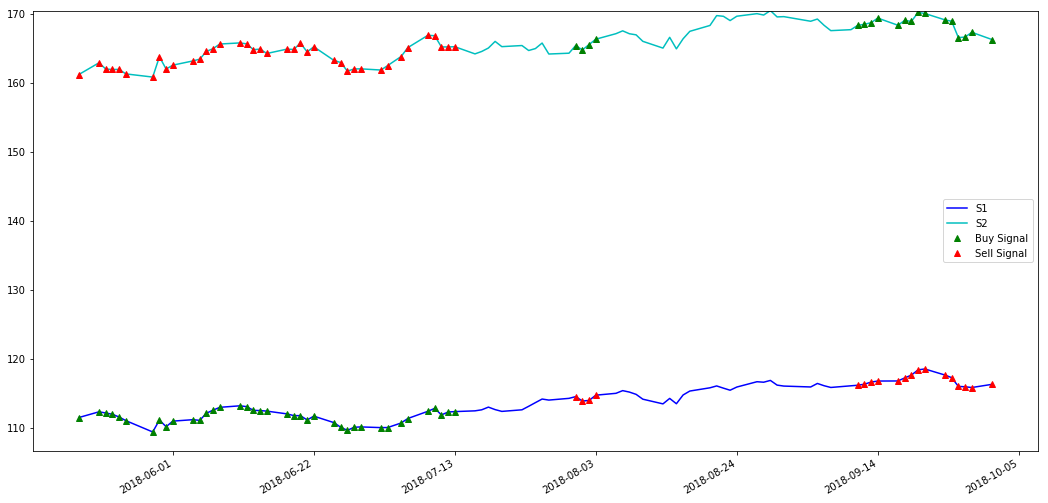

In [ ]:
# Plot the prices and buy and sell signals from z score
pyplot.figure(figsize=(18,9))
S1 = test_data.S1
S2 = test_data.S2

S1[60:].plot(color='b')
S2[60:].plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()

# When buying the ratio, buy S1 and sell S2
buyR[buy!=-100] = S1[buy!=-100]
sellR[buy!=-100] = S2[buy!=-100]
# When selling the ratio, sell S1 and buy S2
buyR[sell!=-100] = S2[sell!=-100]
sellR[sell!=-100] = S1[sell!=-100]

buyR[60:].plot(color='g', linestyle='None', marker='^')
sellR[60:].plot(color='r', linestyle='None', marker='^')
x1,x2,y1,y2 = pyplot.axis()
pyplot.axis((x1,x2,min(S1.min(),S2.min()),max(S1.max(),S2.max())))

pyplot.legend(['S1', 'S2', 'Buy Signal', 'Sell Signal'])
pyplot.show()

In [ ]:
def trade(S1, S2, spread, window1, window2):
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    # Compute rolling mean and rolling standard deviation
    ma1 = spread.rolling(window=window1, center=False).mean()
    ma2 = spread.rolling(window=window2, center=False).mean()
    std = spread.rolling(window=window2, center=False).std()
    zscore = (ma1 - ma2)/std
    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    for i in range(len(spread)):
        # Sell short if the z-score is > 1
        if zscore[i] > 1:
            money += S1[i] - S2[i] * spread[i]
            countS1 -= 1
            countS2 += spread[i]
        # Buy long if the z-score is < 1
        elif zscore[i] < -1:
            money -= S1[i] - S2[i] * spread[i]
            countS1 += 1
            countS2 -= spread[i]
        # Clear positions if the z-score between -.5 and .5
        elif abs(zscore[i]) < 0.5:
            money += countS1 * S1[i] - S2[i] * countS2
            countS1 = 0
            countS2 = 0
    return money

In [ ]:
data = test_data['Actual_Spread']
profit = trade(test_data['S1'], test_data['S2'], data, 30, 5)
profit

91964.78343828625

In [ ]:
# Actual Spread
# 91964.78343828625
# Kalman Filter
# 29959.723177883072
# ARIMA
# 64448.09898119516
# VAR
# 64580.88216334411
# FB Prophet
# 49316.91921868784
# LSTM
# 70589.74374960671